In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data_missingValues.csv')#reading the input

In [3]:
zero_data = dataset.iloc[:,6:7].values#selecting only the required row
mean_data = dataset.iloc[:,6:7].values
median_data = dataset.iloc[:,6:7].values
most_frequent_data = dataset.iloc[:,6:7].values

In [4]:
zero_data = np.delete(zero_data,0)#deletinig the headiing row and only numbers/floats are left
mean_data= np.delete(mean_data,0)
median_data = np.delete(median_data,0)
most_frequent_data = np.delete(most_frequent_data,0)

In [5]:
zero_data[pd.isnull(zero_data)]  = 0 #replaceing nans with zeros

In [6]:
mean_data = mean_data.reshape(-1,1)
median_data = median_data.reshape(-1,1)
most_frequent_data = most_frequent_data.reshape(-1,1)

In [7]:
from sklearn.preprocessing import Imputer #replaceing nans with mean values
imputer = Imputer(missing_values = 'NaN',strategy = 'mean', axis = 0)
imputer.fit(mean_data[:])
mean_data[:] = imputer.transform(mean_data[:])

In [8]:
from sklearn.preprocessing import Imputer #replaceing nans with median
imputer = Imputer(missing_values = 'NaN',strategy = 'median', axis = 0)
imputer.fit(median_data[:])
median_data[:] = imputer.transform(median_data[:])

In [9]:
from sklearn.preprocessing import Imputer #replaceing nans with mode
imputer = Imputer(missing_values = 'NaN',strategy = 'most_frequent', axis = 0)
imputer.fit(most_frequent_data[:])
most_frequent_data[:] = imputer.transform(most_frequent_data[:])

In [10]:
def guassianCurve(mean,std): 
    return (1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2)))

In [11]:
mean_zero_data = np.mean(zero_data, axis=0)
std_zero_data = np.std(zero_data, axis=0)
mean_mean_data = np.mean(mean_data,axis=0)
std_mean_data = np.std(mean_data, axis=0)
mean_median_data = np.mean(median_data,axis=0)
std_median_data = np.std(median_data,axis=0)
mean_most_frequent_data = np.mean(most_frequent_data,axis = 0)
std_most_frequent_data = np.std(most_frequent_data,axis=0)

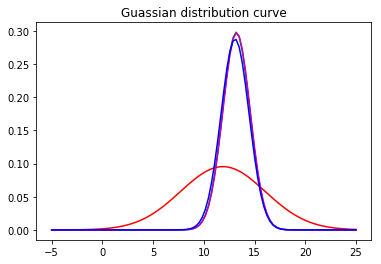

In [12]:
# x = np.arange(0.0,5.0,0.1)
# plt.figure(figsize=(10,10))
x=np.linspace(-5,25,100)
plt.title("Guassian distribution curve")
plt.plot(x,guassianCurve(mean_zero_data,std_zero_data),'r')
plt.plot(x,guassianCurve(mean_mean_data,std_mean_data),'g')
plt.plot(x,guassianCurve(mean_median_data,std_median_data),'m')
plt.plot(x,guassianCurve(mean_most_frequent_data,std_most_frequent_data),'b')
plt.legend()
plt.show()